In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

df = pd.read_csv("D:\ITM\Data_Analysis\ZZ COGNIFYZ internship task\Clean Dataset\cleaned_dataset.csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,le petit souffle,162,makati city,"third floor, century city mall, kalayaan avenu...","century city mall, poblacion, makati city","century city mall, poblacion, makati city, mak...",121.027535,14.565443,"french, japanese, desserts",1100.0,botswana pula(p),yes,no,no,no,3,4.8,dark green,excellent,314
1,6304287,izakaya kikufuji,162,makati city,"little tokyo, 2277 chino roces avenue, legaspi...","little tokyo, legaspi village, makati city","little tokyo, legaspi village, makati city, ma...",121.014101,14.553708,japanese,1200.0,botswana pula(p),yes,no,no,no,3,4.5,dark green,excellent,591
2,6300002,heat - edsa shangri-la,162,mandaluyong city,"edsa shangri-la, 1 garden way, ortigas, mandal...","edsa shangri-la, ortigas, mandaluyong city","edsa shangri-la, ortigas, mandaluyong city, ma...",121.056831,14.581404,"seafood, asian, filipino, indian",400.0,botswana pula(p),yes,no,no,no,4,4.4,green,very good,270
3,6318506,ooma,162,mandaluyong city,"third floor, mega fashion hall, sm megamall, o...","sm megamall, ortigas, mandaluyong city","sm megamall, ortigas, mandaluyong city, mandal...",121.056475,14.585318,"japanese, sushi",400.0,botswana pula(p),no,no,no,no,4,4.9,dark green,excellent,365
4,6314302,sambo kojin,162,mandaluyong city,"third floor, mega atrium, sm megamall, ortigas...","sm megamall, ortigas, mandaluyong city","sm megamall, ortigas, mandaluyong city, mandal...",121.057508,14.584450,"japanese, korean",400.0,botswana pula(p),yes,no,no,no,4,4.8,dark green,excellent,229


# Level - 1 :- Market Overview and Service Distribution


---------------------------

### Task - 1 :- Task: Top Cuisines
 
-> Determine the top three most common cuisines in the dataset.

In [2]:
# make sure all Cuisines column values into the string format.
df["Cuisines"] = df["Cuisines"].astype("str")

# Separate multiple cuisines into individual rows for accurate counting
indi_Cuisines_name = df["Cuisines"].str.split(",").explode().str.strip().str.lower()    

# find the top 3 Cuisines
top_cuisines = indi_Cuisines_name.value_counts().head(3)

print(top_cuisines)


Cuisines
north indian    3960
chinese         2735
fast food       1986
Name: count, dtype: int64


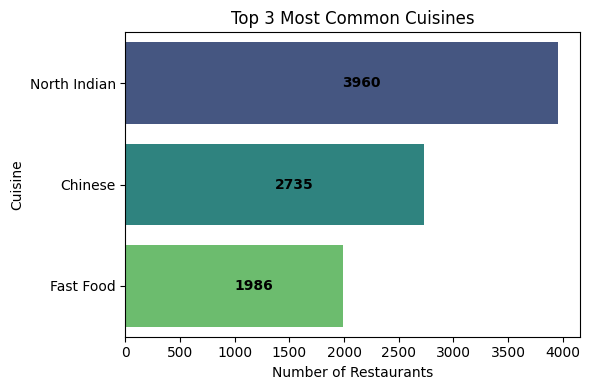

In [3]:
plot_df = pd.DataFrame({
    'Cuisine': top_cuisines.index.str.title(),
    'Count': top_cuisines.values
})


plt.figure(figsize=(6, 4))
ax = sns.barplot(data=plot_df, x='Count', y='Cuisine', hue='Cuisine', palette='viridis', legend=False)

# Add count labels on each bar using loop
for i, v in enumerate(plot_df['Count']):
    ax.text(v / 2, i, str(v), color='black', va='center', fontweight='bold')
    
plt.title("Top 3 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()


-> Calculate the percentage of restaurants that serve each of the top cuisines.

In [4]:
# Total number of restaurants
total_restaurants = df.shape[0]

print(total_restaurants)

9542


- There are 9542 total restaurants.

In [16]:
# Find the percentage of restaurants that serve each of the top cuisines.

percentage_cuisines = ((top_cuisines / total_restaurants) * 100).round(2)

print(percentage_cuisines)

Cuisines
north indian    41.50
chinese         28.66
fast food       20.81
Name: count, dtype: float64


#### Summary :-

- The top 3 cuisines served across restaurants are **North Indian (3960)**, **Chinese (2735)**, and **Fast Food (1986)**, contributing approximately **41.50%**, **28.66%**, and **20.81%** respectively to the overall cuisine distribution.



--------------

### Task 2 :- City Analysis
 
-> Identify the city with the highest number of restaurants in the dataset.

In [17]:
# Count restaurants per city
city_counts = df['City'].value_counts().head(5)

# Total number of restaurants
total_restaurants = df.shape[0]

# Calculate percentage contribution
city_percent = ((city_counts / total_restaurants) * 100).round(2)

print("\nTop 5 City with Highest number of restaurants:-")
print(city_counts)

print("\nPercentage contribution:-")
print(city_percent)



Top 5 City with Highest number of restaurants:-
City
new delhi    5473
gurgaon      1118
noida        1080
faridabad     251
ghaziabad      25
Name: count, dtype: int64

Percentage contribution:-
City
new delhi    57.36
gurgaon      11.72
noida        11.32
faridabad     2.63
ghaziabad     0.26
Name: count, dtype: float64


- all Top 5 city with the highest number of restaurants are in the india.

-> Calculate the average rating for restaurants in each city. 

In [7]:
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

print(avg_rating_per_city)

City
inner city          4.900000
quezon city         4.800000
makati city         4.650000
pasig city          4.633333
mandaluyong city    4.625000
                      ...   
new delhi           2.438845
montville           2.400000
mc millan           2.400000
noida               2.036204
faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64


-> Determine the city with the highest average rating.

In [8]:
# Check top 10 city with highest averageS rating.

avg_rating_df = avg_rating_per_city.reset_index().rename(columns={'Aggregate rating': 'Average Rating'})

print("\n Top 10 highest avg. rating city:-")
print(avg_rating_df.head(10))



 Top 10 highest avg. rating city:-
               City  Average Rating
0        inner city        4.900000
1       quezon city        4.800000
2       makati city        4.650000
3        pasig city        4.633333
4  mandaluyong city        4.625000
5        beechworth        4.600000
6            london        4.535000
7       taguig city        4.525000
8           lincoln        4.500000
9     tagaytay city        4.500000


#### Summary :-

- Top 5 cities with the highest restaurants are **New Delhi**, **Gurgaon**, **Noida**, **Faridabad**, and **Ghaziabad**. New Delhi alone contributes around **57.35%** of the total data.

- There are overall 140 cities.

- Top 10 highest avg. rating cities are **Inner City (4.90)**, **Quezon City (4.80)**, **Makati City (4.65)**, and others with ratings above **4.50**, showing strong customer satisfaction.

----------

### Task 3 :- Price Range Distribution

-> Price Range Distribution Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
 
-> Calculate the percentage of restaurants in each price range category.

In [18]:
# Total restaurants in each price range.
total_restaurants_count = df["Price range"].value_counts().sort_index()

# Total restaurants
total_restaurants = df.shape[0]

# Calculate the percentage of restaurants in each price range category.
percentage_restaurants = (total_restaurants_count / total_restaurants * 100).round(2)


# Create a dataframe to show findings in the better way.
price_df = pd.DataFrame({
    "Price range" : total_restaurants_count.index,
    "Total restaurants" : total_restaurants_count.values,
    "Percentage_restaurants" : percentage_restaurants.values
})


print(price_df)

   Price range  Total restaurants  Percentage_restaurants
0            1               4438                   46.51
1            2               3113                   32.62
2            3               1405                   14.72
3            4                586                    6.14


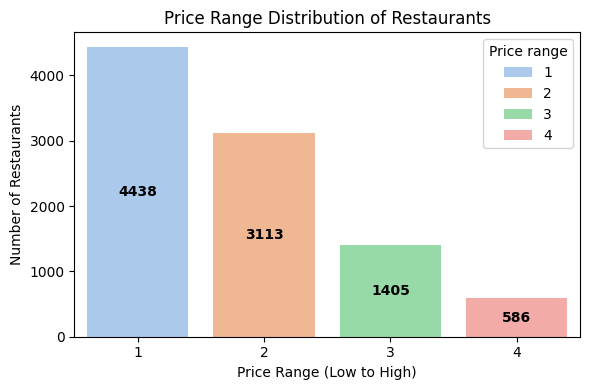

In [ ]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(data=price_df, x='Price range', y='Total restaurants', palette='pastel', hue='Price range')

# Add count labels inside each bar
for i, v in enumerate(price_df['Total restaurants']):
    ax.text(i, v / 2, str(v), color='black', ha='center', va='center', fontweight='bold')

plt.title("Price Range Distribution of Restaurants")
plt.xlabel("Price Range (Low to High)")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


#### Summary :-

- There are total 9542 restaurants.

-> Price range distributions low to high. (1 = low and 4 = high)

- There are Total **4438** restaurants in the Price range **1** which hold the total **46.51%** of market.
- in Price range 4 there are only **586** restaurants which are high Price range restaurants, which hold only **6.14%** market.
- it show that around **75%** restaurants (price range 1 and 2) affordable.


-----

### Task 4 :- Online Delivery

-> Determine the percentage of restaurants that offer online delivery.



In [11]:
# find the resturants which are offer online delivery.
online_delivery_restaurants = df['Has Online delivery'].value_counts()

# find the total resturants
total_restaurants = df.shape[0]

# find the percentage of restaurants that offer onlive delivery.
percentage_restaurants_online_delivery = (online_delivery_restaurants/total_restaurants * 100).round(2) 

online_delivery_restaurants_df = pd.DataFrame({
    "Online Delivery" : online_delivery_restaurants.index,
    "Total restaurants" : online_delivery_restaurants.values,
    "Percentage" : percentage_restaurants_online_delivery.values
})

print(online_delivery_restaurants_df)

  Online Delivery  Total restaurants  Percentage
0              no               7091       74.31
1             yes               2451       25.69


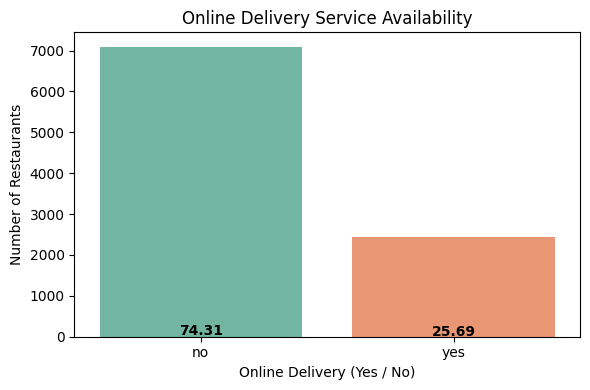

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(data=online_delivery_restaurants_df,x='Online Delivery',y='Total restaurants',palette='Set2', hue='Online Delivery')

# Add value labels on bars
for i, v in enumerate(online_delivery_restaurants_df['Percentage']):
    plt.text(i, v/2, str(v), ha='center', fontweight='bold')


plt.title("Online Delivery Service Availability")
plt.xlabel("Online Delivery (Yes / No)")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

-> Compare the average ratings of restaurants with and without online delivery.

In [12]:
comparision_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean().round(2)

print(comparision_rating)

Has Online delivery
no     2.46
yes    3.25
Name: Aggregate rating, dtype: float64


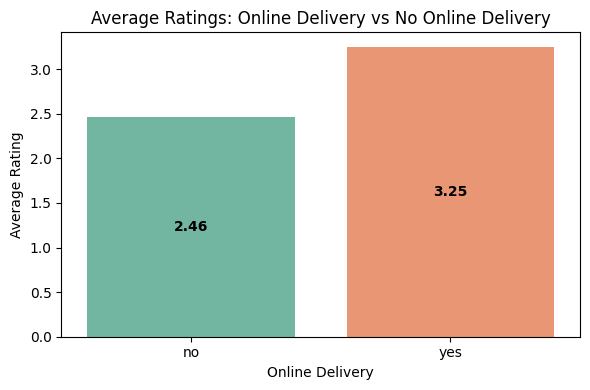

In [13]:
rating_df = comparision_rating.reset_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=rating_df, x='Has Online delivery', y='Aggregate rating', palette='Set2', hue="Has Online delivery")

for i, v in enumerate(rating_df['Aggregate rating']):
    ax.text(i, v / 2, str(v), color='black', ha='center', va='center', fontweight='bold')

plt.title("Average Ratings: Online Delivery vs No Online Delivery")
plt.xlabel("Online Delivery")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

#### Summary :-

- The **74.31%** restaurant does not give online delivery.
- Only **25.69%** restaurant support online delivery.

- also, we found that the avg. rating of the **restaurant which support online delivery is 3.25**. 
- Where as which **restaurant does not support online delivery their avg. rating is 2.46**.
